In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from env import host, user, password
from acquire import get_telco_data
import prepare as p
import explore as e

In [2]:
df = get_telco_data()

In [3]:
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,3
contract_type_id,1,1,1,1,1
internet_service_type_id,3,3,3,3,3
customer_id,0030-FNXPP,0031-PVLZI,0098-BOWSO,0107-WESLM,0114-RSRRW
gender,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

**Initial thoughts**
- need to drop first four columns as they are keys and will not add value
- could change all binary categoricals to consistent format
- total_charges column is in object format and will need to be formatted to float

In [5]:
df.describe()

,payment_type_id,contract_type_id,internet_service_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.690473,1.872923,0.162147,32.371149,64.761692
std,1.148907,0.833755,0.737796,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,1.000000,2.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


**Not a lot of value added by this describe since most ofthese columns are not really numerical and some that are aren't represented due to data type issues**

#### Do some preliminary cleaning so that value counts and summary stats are actually useful

In [6]:
# drop unnecessary columns to get them out of the way
df.drop(columns=['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'customer_id'], inplace=True)

In [7]:
df.head().T

,0,1,2,3,4
gender,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
online_security,No internet service,No internet service,No internet service,No internet service,No internet service
online_backup,No internet service,No internet service,No internet service,No internet service,No internet service
device_protection,No internet service,No internet service,No internet service,No internet service,No internet service


In [8]:
# Change senior_citizen column to 'Yes' or 'No', instead of 1 or 0 for consistency and to help with exploration
df.senior_citizen = np.where(df.senior_citizen == 1, 'Yes', 'No')

In [9]:
# Check
df.senior_citizen.value_counts()

No     5901
Yes    1142
Name: senior_citizen, dtype: int64

In [10]:
# fix data type issue with total_charges
# df.total_charges.astype('float')
# can't covert single space string to float
# let's see what's going on with these customers that have single space string for their total_charges

In [11]:
df[df.total_charges == ' ']

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
3977,Male,No,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,19.70,,No,None,One year,Mailed check
5512,Female,No,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.00,,No,None,Two year,Mailed check
5548,Male,No,No,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,20.25,,No,None,Two year,Mailed check
5558,Male,No,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.35,,No,None,Two year,Mailed check
5629,Male,No,Yes,Yes,0,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,25.75,,No,None,Two year,Mailed check
5838,Male,No,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.85,,No,None,Two year,Mailed check
6500,Female,No,Yes,Yes,0,No,No phone service,Yes,Yes,Yes,Yes,Yes,No,No,56.05,,No,DSL,Two year,Credit card (automatic)
6571,Male,No,No,Yes,0,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,61.90,,No,DSL,Two year,Bank transfer (automatic)
6651,Female,No,Yes,Yes,0,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,73.35,,No,DSL,Two year,Mailed check
6670,Female,No,Yes,Yes,0,No,No phone service,Yes,No,Yes,Yes,Yes,No,Yes,52.55,,No,DSL,Two year,Bank transfer (automatic)


**Looks they are brand new customers that have a tenure of 0 and therefore their monthly charges should best set to 0**

In [12]:
# change values
df.total_charges.replace(to_replace={' ' : '0'}, inplace = True)

In [13]:
# now retry converting them to a float
df.total_charges = df.total_charges.astype('float')

In [14]:
# check
df.total_charges.dtype

dtype('float64')

In [15]:
# take a look at all columns and dtypes to make sure we are good to move on
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

In [16]:
# combine all cleaning into a function to be added to .py script
def clean_telco(df):
    df.drop(columns = ['payment_type_id', 'contract_type_id', 'internet_service_type_id', 'customer_id'], inplace=True)
    df.total_charges.replace(to_replace={' ' : '0'}, inplace = True)
    df.total_charges = df.total_charges.astype('float')
    df.senior_citizen = np.where(df.senior_citizen == 1, 'Yes', 'No')
    return df

In [17]:
df = get_telco_data()
df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,3
contract_type_id,1,1,1,1,1
internet_service_type_id,3,3,3,3,3
customer_id,0030-FNXPP,0031-PVLZI,0098-BOWSO,0107-WESLM,0114-RSRRW
gender,Female,Female,Male,Male,Female
senior_citizen,0,0,0,0,0
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes


In [18]:
df = clean_telco(df)

In [19]:
df.head().T

,0,1,2,3,4
gender,Female,Female,Male,Male,Female
senior_citizen,No,No,No,No,No
partner,No,Yes,No,No,Yes
dependents,No,Yes,No,No,No
tenure,3,4,27,1,10
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,No,No,No,No
online_security,No internet service,No internet service,No internet service,No internet service,No internet service
online_backup,No internet service,No internet service,No internet service,No internet service,No internet service
device_protection,No internet service,No internet service,No internet service,No internet service,No internet service


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7043 non-null   object 
 1   senior_citizen         7043 non-null   object 
 2   partner                7043 non-null   object 
 3   dependents             7043 non-null   object 
 4   tenure                 7043 non-null   int64  
 5   phone_service          7043 non-null   object 
 6   multiple_lines         7043 non-null   object 
 7   online_security        7043 non-null   object 
 8   online_backup          7043 non-null   object 
 9   device_protection      7043 non-null   object 
 10  tech_support           7043 non-null   object 
 11  streaming_tv           7043 non-null   object 
 12  streaming_movies       7043 non-null   object 
 13  paperless_billing      7043 non-null   object 
 14  monthly_charges        7043 non-null   float64
 15  tota

#### Create for loop to get value counts for all categorical variables

In [21]:
# get list of all categorical columns
cat_cols = df.select_dtypes('object').columns.tolist()

In [22]:
# get a list of all numerical columns 
num_cols = df.select_dtypes('number').columns.tolist()

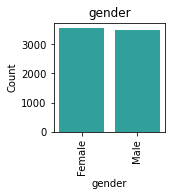

        gender  Count  Percent
Male    Female   3555    50.48
Female    Male   3488    49.52
_________________________________________________________________


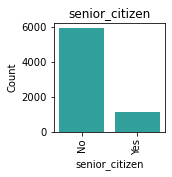

    senior_citizen  Count  Percent
No              No   5901    83.79
Yes            Yes   1142    16.21
_________________________________________________________________


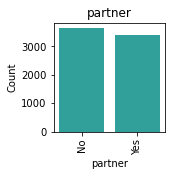

    partner  Count  Percent
No       No   3641     51.7
Yes     Yes   3402     48.3
_________________________________________________________________


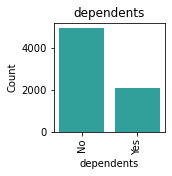

    dependents  Count  Percent
No          No   4933    70.04
Yes        Yes   2110    29.96
_________________________________________________________________


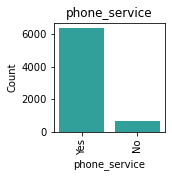

    phone_service  Count  Percent
Yes           Yes   6361    90.32
No             No    682     9.68
_________________________________________________________________


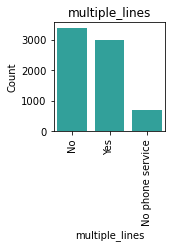

                    multiple_lines  Count  Percent
No                              No   3390    48.13
Yes                            Yes   2971    42.18
No phone service  No phone service    682     9.68
_________________________________________________________________


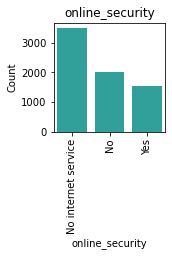

                         online_security  Count  Percent
No                   No internet service   3498    49.67
Yes                                   No   2019    28.67
No internet service                  Yes   1526    21.67
_________________________________________________________________


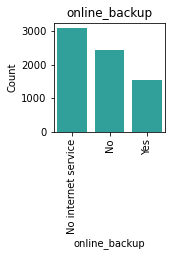

                           online_backup  Count  Percent
No                   No internet service   3088    43.84
Yes                                   No   2429    34.49
No internet service                  Yes   1526    21.67
_________________________________________________________________


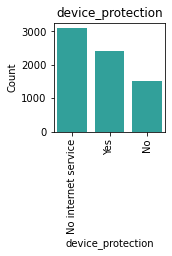

                       device_protection  Count  Percent
No                   No internet service   3095    43.94
Yes                                  Yes   2422    34.39
No internet service                   No   1526    21.67
_________________________________________________________________


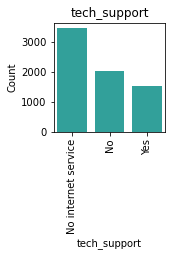

                            tech_support  Count  Percent
No                   No internet service   3473    49.31
Yes                                   No   2044    29.02
No internet service                  Yes   1526    21.67
_________________________________________________________________


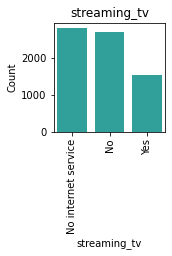

                            streaming_tv  Count  Percent
No                   No internet service   2810    39.90
Yes                                   No   2707    38.44
No internet service                  Yes   1526    21.67
_________________________________________________________________


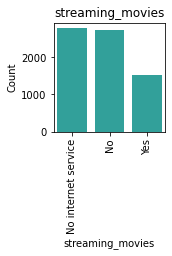

                        streaming_movies  Count  Percent
No                   No internet service   2785    39.54
Yes                                   No   2732    38.79
No internet service                  Yes   1526    21.67
_________________________________________________________________


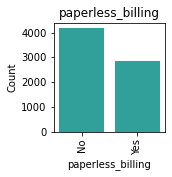

    paperless_billing  Count  Percent
Yes                No   4171    59.22
No                Yes   2872    40.78
_________________________________________________________________


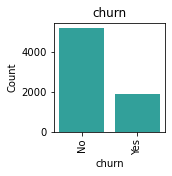

    churn  Count  Percent
No     No   5174    73.46
Yes   Yes   1869    26.54
_________________________________________________________________


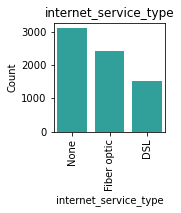

            internet_service_type  Count  Percent
Fiber optic                  None   3096    43.96
DSL                   Fiber optic   2421    34.37
None                          DSL   1526    21.67
_________________________________________________________________


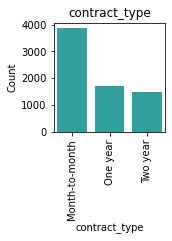

                 contract_type  Count  Percent
Month-to-month  Month-to-month   3875    55.02
Two year              One year   1695    24.07
One year              Two year   1473    20.91
_________________________________________________________________


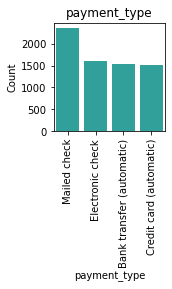

                                        payment_type  Count  Percent
Electronic check                        Mailed check   2365    33.58
Mailed check                        Electronic check   1612    22.89
Bank transfer (automatic)  Bank transfer (automatic)   1544    21.92
Credit card (automatic)      Credit card (automatic)   1522    21.61
_________________________________________________________________


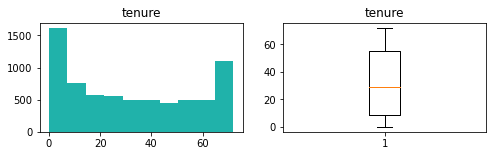

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


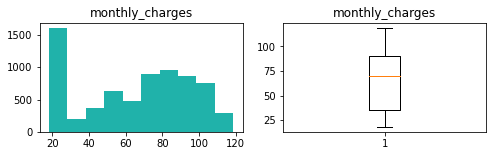

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


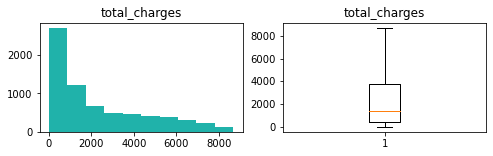

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: total_charges, dtype: float64


In [23]:
# use explore module to look at distributions and value counts for all columns
e.explore_univariate(df, cat_cols, num_cols)